# 1. Problem Statement
We need to predict if the given transaction done by the customer is fraudelent or not, by analyzing PCA transformed original features

## Importing dependencies

In [126]:
# FOR LINEAR ALGEBRA AND INPUT OUTPUT
import pandas as pd
import numpy as np

# FOR DATA VISUALIZATIONS
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DATA PREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# MACHINE LEARNING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# ACCURACY METRICS
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split


## 1. Reading the dataset

In [2]:
# importing the dataset to pandas dataframe
df = pd.read_csv(r'C:\Users\aa\OneDrive\Documents\Project\credit card fraud detection\creditcard.csv',sep=',')

In [34]:
# first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1. We can see the features given are not original (due to security reasons) but PCa transformed features from V1 to V28 are given
2. Time , Amount and Target Class is also there

In [35]:
df.shape

(284807, 31)

### 2. Exploratory Data Analysis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
# checking the number of missing values in each columns
df.isnull().sum()   # so there are0 null values in any column

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].unique()  # so there are only two values normal transaction and fraudelent

array([0, 1], dtype=int64)

#### Observations
1. There are no null values in any of the column
2. There are 2 types of variables
    1. Numerical variables - V1 to V28, Amount, Time     
        -> independent variables
    2. Categorical variable (binary) - Class             
        -> dependent variable (to predict)
3. Unique values in "Class" are 0 and 1

    0 -> normal transactions
    
    1 -> fraudelent transactions

In [38]:
# so check the distribution of normal and fraudelent transaction
df['Class'].value_counts() 

0    284315
1       492
Name: Class, dtype: int64

Text(1, 246, '492')

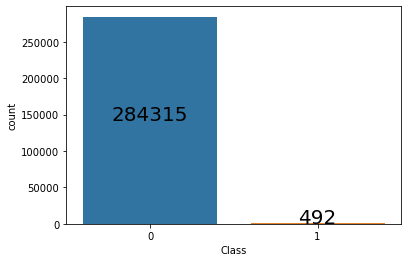

In [49]:
sns.countplot(data = df, x = 'Class')
fraudnt, fraud = df.Class.value_counts()
plt.text(0, fraudnt//2, fraudnt, fontsize = 20,  horizontalalignment='center')
plt.text(1, fraud//2, fraud, fontsize = 20, horizontalalignment='center')

#### Observation
1. Our dataset is highly imbalanced (around 99%)
2. Training imbalanced data for predictions may result in poor performance

So we will resolve this issue while training our model. Untill then lets look at the distributions of particular Class

In [90]:
# this dataset are highly unbalanced (around 99%)
# we can not train our ML model directly with this data as it will favour normal data

# so seperating the data for analysis 
legit = df[df['Class']==0]
fraud = df[df['Class']==1]

In [91]:
print(df.shape)
print(legit.shape)
print(fraud.shape)

(284807, 31)
(284315, 31)
(492, 31)


In [92]:
# lets take a statistial measure of Amount 
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [93]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [94]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Observation
1. mean transactions of fraud transaction is more than legit transactions
2. we can infer that transactions in case of fraud cases are more spreaded, whereas in case of normal cases they are concentrated

C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

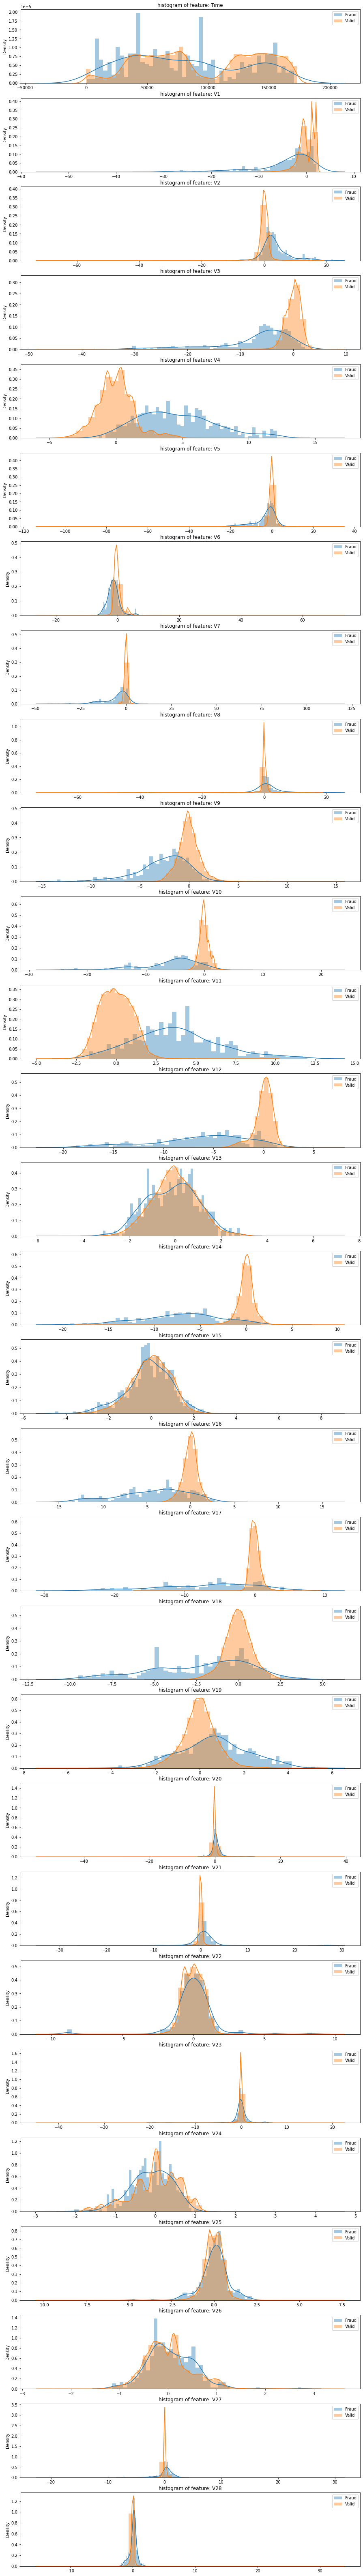

In [53]:
features = df.iloc[:,0:29].columns
plt.figure(figsize=(15,29*4))
gs = gridspec.GridSpec(29, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.Class == 1], bins=50,label='Fraud')
    sns.distplot(df[c][df.Class == 0], bins=50,label="Valid")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

#### observation
We can clearly see the differences of fraudelent and normal transactions. normal cases are generally concentrated together and have sharp curve, whereas fraud cases are spreaded

C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Time')

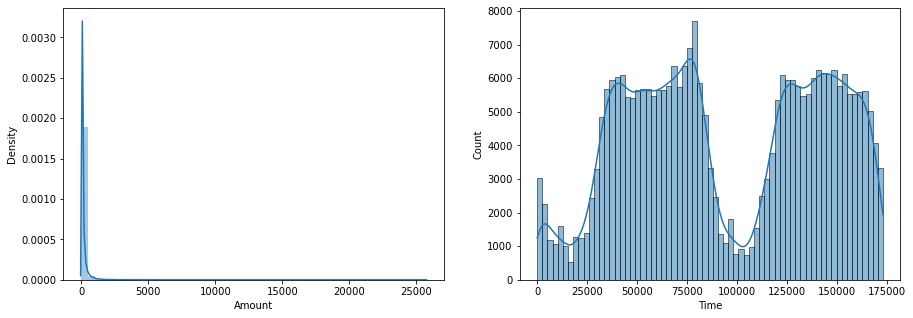

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df.Amount.values, kde = True)
plt.xlabel('Amount')
plt.subplot(122)
sns.histplot(df.Time.values, kde = True)
plt.xlabel('Time')

C:\Users\aa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'time domain in fraud cases')

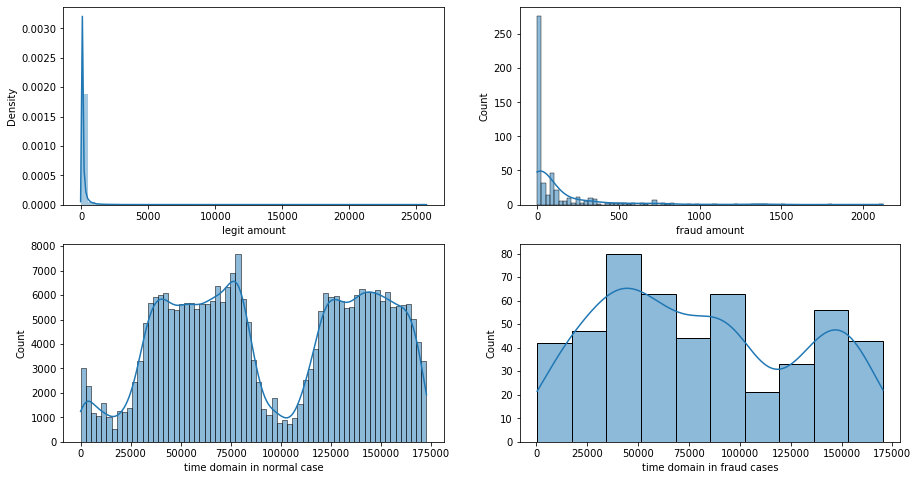

In [87]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(df[df.Class == 0].Amount.values, kde = True)
plt.xlabel("legit amount")
plt.subplot(222)
sns.histplot(df[df.Class == 1].Amount.values, kde = True)
plt.xlabel("fraud amount")

plt.subplot(223)
sns.histplot(df[df.Class == 0].Time.values, kde = True)
plt.xlabel("time domain in normal case")

plt.subplot(224)
sns.histplot(df[df.Class == 1].Time.values, kde = True)
plt.xlabel("time domain in fraud cases")


#### observation
1. we can see that in normal cases, amount is left skewed indicating normal low volume bank transactions, whereas in fraud cases cash outflow is larger
2. In case of normal cases transactions are periodic/seasonal indicating specific routine of people, whereas in fraud cases transactions doesn't follow any trend

### 3. Scaling the data
Since all the features except Amount and Time are PCA transformed and hence Scaled
Now we have to Scale the remaining data

In [127]:
std_scaler = StandardScaler()

#Normalizing the dataframe
df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

<AxesSubplot:>

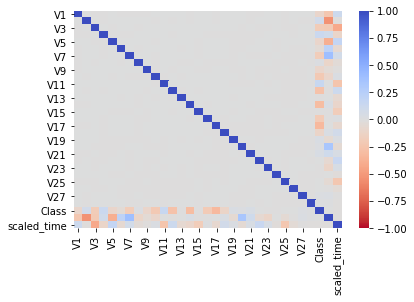

In [128]:
sns.heatmap(df.corr(), cmap='coolwarm_r', vmin = -1, vmax = 1, center = 0)


We can see that no features are correlated. but this is might due to imbalanced dataset. So lets first balance the data

### 4. Handling unbalanced data

#### Under-Sampling   
reducing the size normal trasaction dataset nearly equal to fraudulent transaction

Building a sample dataset containing similar distribution of normal and fraudelent transaction

In [132]:
legit = df[df['Class']==0]
fraud = df[df['Class']==1]

In [133]:
legit_sample = legit.sample(n=len(fraud))

In [134]:
# concatinating fraud and legit_sample data frames
new_dataset = pd.concat([legit_sample,fraud],axis=0)  #axis = 0 means adding row wise, axis=1 means column wise

In [135]:
print(new_dataset.shape)
new_dataset.head()

(984, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
247891,2.036546,-0.007456,-2.582721,0.225433,0.849182,-1.176666,0.869298,-0.389635,-0.004575,0.260741,...,1.009209,-0.205480,0.808057,0.754364,0.067436,-0.100501,-0.085102,0,-0.204581,1.240588
151227,1.939254,-0.056065,-1.901471,0.234665,1.262065,1.210067,-0.353297,0.368470,1.768868,-0.670709,...,-0.900700,0.371797,-1.140048,-0.504522,0.245929,-0.054264,-0.065901,0,-0.335278,0.004741
95252,1.258517,-1.041295,0.853234,-0.547691,-1.511302,-0.212640,-1.115182,0.060067,0.035441,0.497129,...,0.779163,-0.217630,-0.078077,0.474158,-0.020305,0.031749,0.031002,0,-0.037381,-0.623059
13059,-0.538785,0.628338,1.988673,0.805848,-0.307354,0.372118,0.455466,0.180082,0.707063,-0.719359,...,0.735953,0.046867,0.158064,-0.006757,-0.333570,0.018829,0.025290,0,0.062572,-1.513978
221571,1.794417,-0.454005,-0.420754,0.492068,-0.548457,-0.533513,-0.208341,-0.143133,0.960409,-0.248102,...,-0.438979,0.375105,1.135562,-0.456246,-0.736467,0.017133,-0.001616,0,0.049058,1.006509


In [136]:
new_dataset['Class'].value_counts()  #now we have get uniformly distributed data

0    492
1    492
Name: Class, dtype: int64

Text(1, 246, '492')

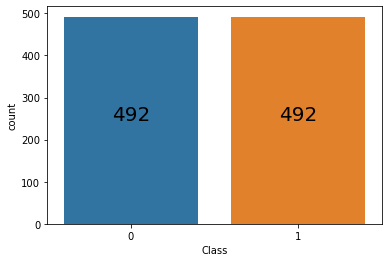

In [139]:
sns.countplot(data = new_dataset, x = 'Class')
fraudnt, fraud = new_dataset.Class.value_counts()
plt.text(0, fraudnt//2, fraudnt, fontsize = 20,  horizontalalignment='center')
plt.text(1, fraud//2, fraud, fontsize = 20, horizontalalignment='center')

Wow! so it is perfectly balanced. Now lets do correlational analysis

<AxesSubplot:>

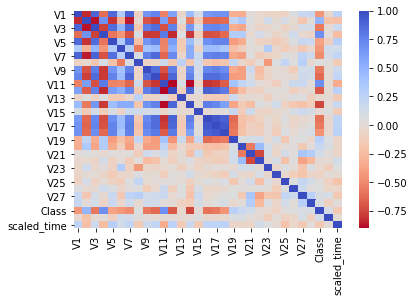

In [142]:
sns.heatmap(new_dataset.corr(), cmap='coolwarm_r')

In [137]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
Class,,,,,,,,,,,,,,,,,,,,,
0,0.016638,0.143248,0.085821,0.083322,0.011145,0.115298,0.042459,0.075517,0.054661,0.012266,...,-0.002314,0.022519,0.001095,-0.019491,0.000317,0.004182,0.002717,-0.000491,-0.052337,0.008248
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382,-0.296223


this differrence in mean data tells us that the nature of dataset does not change much. this means that it is a good sample to predict. if it would be very different from original it will not be a good sample

Lets look at the data in lower dimention 
#### Using TSNE

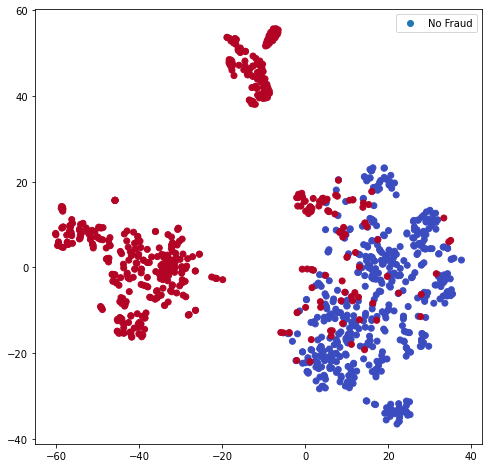

In [147]:
# Making a subset to plot points clearly
plt.figure(figsize=(8,8))
X_sub = new_dataset.copy().drop('Class', axis=1)
y_sub = new_dataset.copy()['Class']
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_sub.values)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 0), cmap='coolwarm_r', label='No Fraud')
#plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 1), cmap='coolwarm_r', label='Fraud')
plt.legend()

#### Observation
1. Clearly seen that fraud and normal cases have different clusters and hence can be seperated by single straight line
2. So Logistic Regression Classification can work well on this dataset

## 5. Machine Learning

In [164]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [165]:
print(X.shape)  # this is our independent features
X.head()

(984, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
247891,2.036546,-0.007456,-2.582721,0.225433,0.849182,-1.176666,0.869298,-0.389635,-0.004575,0.260741,...,0.345780,1.009209,-0.205480,0.808057,0.754364,0.067436,-0.100501,-0.085102,-0.204581,1.240588
151227,1.939254,-0.056065,-1.901471,0.234665,1.262065,1.210067,-0.353297,0.368470,1.768868,-0.670709,...,-0.433227,-0.900700,0.371797,-1.140048,-0.504522,0.245929,-0.054264,-0.065901,-0.335278,0.004741
95252,1.258517,-1.041295,0.853234,-0.547691,-1.511302,-0.212640,-1.115182,0.060067,0.035441,0.497129,...,0.308644,0.779163,-0.217630,-0.078077,0.474158,-0.020305,0.031749,0.031002,-0.037381,-0.623059
13059,-0.538785,0.628338,1.988673,0.805848,-0.307354,0.372118,0.455466,0.180082,0.707063,-0.719359,...,0.228521,0.735953,0.046867,0.158064,-0.006757,-0.333570,0.018829,0.025290,0.062572,-1.513978
221571,1.794417,-0.454005,-0.420754,0.492068,-0.548457,-0.533513,-0.208341,-0.143133,0.960409,-0.248102,...,-0.136257,-0.438979,0.375105,1.135562,-0.456246,-0.736467,0.017133,-0.001616,0.049058,1.006509


In [166]:
Y # this is our dependent features

247891    0
151227    0
95252     0
13059     0
221571    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

Now split the data into train data and test data

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,stratify=Y, random_state=2)

In [168]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (659, 30) (325, 30)


### Model Training


In [169]:
def model_eval(y_actual, predicted):
    """
    Evaluates a model's accuracy using classification report and confusion matrix

        Parameters
        ----------
        y_actual : pandas.core.series.Series
            target pandas series
        
        predicted : pandas.core.series.Series
            pandas series of predictions

        Returns
        -------
        classification report followed by confusion matrix for the arrays given
    """
    print(classification_report(y_actual, predicted, target_names = ['Not Fraud', 'Fraud']))
    sns.heatmap(data = confusion_matrix(y_actual, predicted), annot = True,  cmap = "coolwarm_r",center = 0)

### 1. Logistic Regression

In [170]:
model = LogisticRegression()

In [171]:
# training the model with training data
model.fit(X_train,Y_train)

LogisticRegression()

#### On Sample data

In [172]:
# evaluation of our model based on accuracy score
# accuracy on training data
X_train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(Y_train,X_train_predictions)
print('Accuracy on training data :',train_accuracy)

Accuracy on training data : 0.9575113808801214


              precision    recall  f1-score   support

   Not Fraud       0.89      0.96      0.93       163
       Fraud       0.96      0.88      0.92       162

    accuracy                           0.92       325
   macro avg       0.93      0.92      0.92       325
weighted avg       0.93      0.92      0.92       325

roc_auc_score on testing data 0.9229531167158979
Accuracy on testing data : 0.9230769230769231


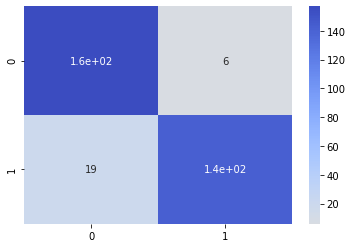

In [173]:
# this is good, but the accuracy score o test data is important
# it should not vary much with respect to training accuracy
X_test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,X_test_predictions)
model_eval(Y_test,X_test_predictions)
print("roc_auc_score on testing data",roc_auc_score(Y_test,X_test_predictions))
print('Accuracy on testing data :',test_accuracy)

we can see that our accuracies on both dataset are similar

Note - If we have very vast difference in training data and test data it means our model is ovefitted or underfitted

#### Observations


#### On original data

(284807, 30) (190820, 30) (93987, 30)
Accuracy on original training data : 0.967571533382245
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.98     93825
       Fraud       0.05      0.94      0.09       162

    accuracy                           0.97     93987
   macro avg       0.52      0.96      0.54     93987
weighted avg       1.00      0.97      0.98     93987

roc_auc_score on original testing data 0.9557180921929124
Accuracy on original testing data : 0.9669528764616383


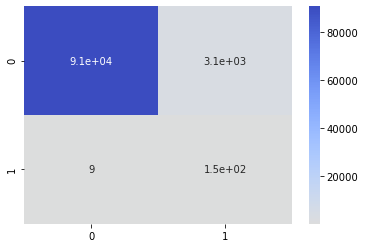

In [174]:
X_or = df.drop(columns='Class',axis=1)
Y_or = df['Class']
X_train_or, X_test_or, Y_train_or, Y_test_or = train_test_split(X_or,Y_or, test_size=0.33,stratify=Y_or, random_state=2)
print(X_or.shape,X_train_or.shape,X_test_or.shape)

#model.fit(X_train_or,Y_train_or)
X_train_predictions_or = model.predict(X_train_or)
train_accuracy_or = accuracy_score(Y_train_or,X_train_predictions_or)
print('Accuracy on original training data :',train_accuracy_or)

X_test_predictions_or = model.predict(X_test_or)
test_accuracy_or = accuracy_score(Y_test_or,X_test_predictions_or)
model_eval(Y_test_or,X_test_predictions_or)
print("roc_auc_score on original testing data",roc_auc_score(Y_test_or,X_test_predictions_or))
print('Accuracy on original testing data :',test_accuracy_or)

In [175]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [189]:
def output(model,X_train,X_test,Y_train,Y_test):
    #svc = SVC()
    model.fit(X_train,Y_train)
    X_train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train,X_train_predictions)
    print('Accuracy on training data :',train_accuracy)

    X_test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test,X_test_predictions)
    model_eval(Y_test,X_test_predictions)
    print("roc_auc_score on testing data",roc_auc_score(Y_test,X_test_predictions))
    print('Accuracy on testing data :',test_accuracy)

#### 2. Support Vector Machine

Accuracy on training data : 0.9423368740515933
              precision    recall  f1-score   support

   Not Fraud       0.88      0.99      0.93       163
       Fraud       0.99      0.87      0.92       162

    accuracy                           0.93       325
   macro avg       0.94      0.93      0.93       325
weighted avg       0.94      0.93      0.93       325

roc_auc_score on testing data 0.9290502158600317
Accuracy on testing data : 0.9292307692307692


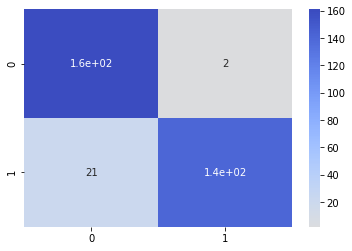

In [190]:
svc = SVC()
output(svc,X_train,X_test,Y_train,Y_test)

#### 3. KNeighborsClassifier

Accuracy on training data : 0.9468892261001517
              precision    recall  f1-score   support

   Not Fraud       0.88      0.99      0.93       163
       Fraud       0.99      0.86      0.92       162

    accuracy                           0.92       325
   macro avg       0.93      0.92      0.92       325
weighted avg       0.93      0.92      0.92       325

roc_auc_score on testing data 0.9228773763538589
Accuracy on testing data : 0.9230769230769231


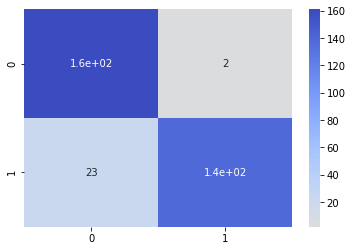

In [191]:
KNC = KNeighborsClassifier()
output(KNC,X_train,X_test,Y_train,Y_test)

#### 4. DecisionTreeClassifier

Accuracy on training data : 1.0
              precision    recall  f1-score   support

   Not Fraud       0.90      0.89      0.89       163
       Fraud       0.89      0.90      0.89       162

    accuracy                           0.89       325
   macro avg       0.89      0.89      0.89       325
weighted avg       0.89      0.89      0.89       325

roc_auc_score on testing data 0.8923161402711504
Accuracy on testing data : 0.8923076923076924


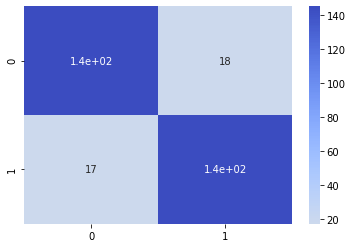

In [192]:
DTC = DecisionTreeClassifier()
output(DTC,X_train,X_test,Y_train,Y_test)

#### 5. RandomForestClassifier

Accuracy on training data : 1.0
              precision    recall  f1-score   support

   Not Fraud       0.89      0.98      0.93       163
       Fraud       0.97      0.88      0.92       162

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

roc_auc_score on testing data 0.9260016662879648
Accuracy on testing data : 0.9261538461538461


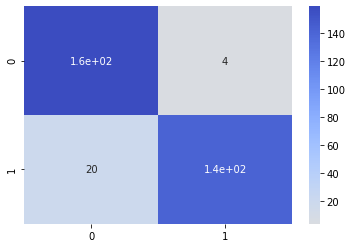

In [193]:
RFC = RandomForestClassifier()
output(RFC,X_train,X_test,Y_train,Y_test)

### On original dataset

In [194]:
X_or = df.drop(columns='Class',axis=1)
Y_or = df['Class']
X_train_or, X_test_or, Y_train_or, Y_test_or = train_test_split(X_or,Y_or, test_size=0.33,stratify=Y_or, random_state=2)
print(X_or.shape,X_train_or.shape,X_test_or.shape)

(284807, 30) (190820, 30) (93987, 30)


For Decesion Tree Classifier
Accuracy on training data : 1.0
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93825
       Fraud       0.70      0.80      0.74       162

    accuracy                           1.00     93987
   macro avg       0.85      0.90      0.87     93987
weighted avg       1.00      1.00      1.00     93987

roc_auc_score on testing data 0.8978497202238209
Accuracy on testing data : 0.9990530605296477
None


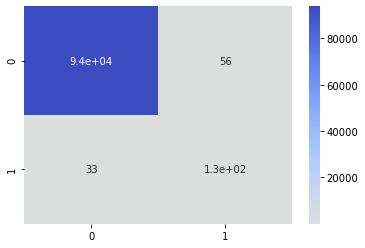

In [196]:
print("For Decesion Tree Classifier")
print(output(DTC,X_train_or,X_test_or,Y_train_or,Y_test_or))

For Random Forest Classifier
Accuracy on training data : 0.9999947594591762
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93825
       Fraud       0.92      0.82      0.87       162

    accuracy                           1.00     93987
   macro avg       0.96      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987

roc_auc_score on testing data 0.9104298783195667
Accuracy on testing data : 0.9995637694574782
None


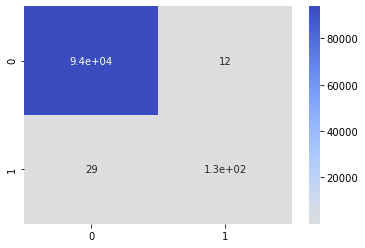

In [197]:
print("For Random Forest Classifier")
print(output(RFC,X_train_or,X_test_or,Y_train_or,Y_test_or))

### Observations
* Recall on fraud cases
1. Logistic Regression -> accuracy = 0.9230769230769231, Recall = 0.88
2. Decision Tree Claasifier -> accuracy = 0.8923076923076924 , recall = 0.90 
